In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
while 'ipython' in os.getcwd():
    os.chdir('..')
    
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pdf2image import convert_from_path
from mim_ocr.graph.graph_utils import get_vertex_with_text
from mim_ocr.graph.graph_model import GraphFactory
from mim_ocr.graph.builders import RadiusEdgeBuilder, VerticalEdgeBuilder, HorizontalEdgeBuilder, EdgeBuilder
from mim_ocr.backends import TesseractBackend
from mim_ocr.data_model.box import BoxType, Box
from mim_ocr.graph.visualization import draw_neighbourhood

In [2]:
PATH = Path('tests/input_data/example_report1.png')
image = np.array(Image.open(PATH))

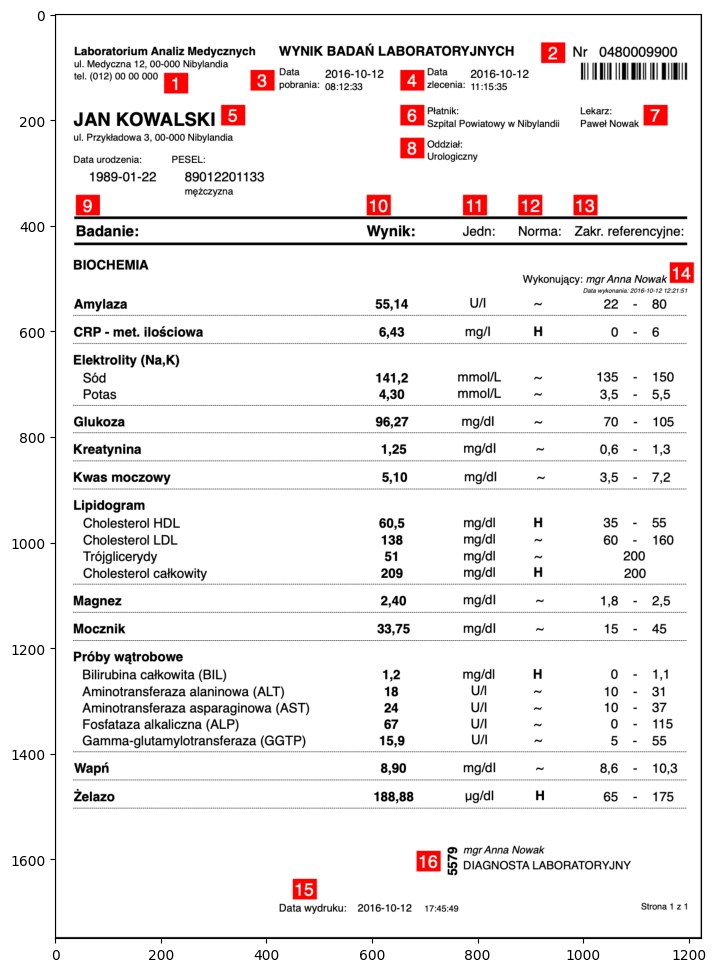

In [3]:
plt.figure(figsize=(10, 12))
plt.imshow(image)
plt.show()

In [4]:
box = TesseractBackend().run_ocr_to_box(image)
gf = GraphFactory(edge_builders=[VerticalEdgeBuilder])
graph = gf.build_graph_for_root_box(box, BoxType.TESSERACT_WORD)

v = get_vertex_with_text(text="PESEL", graph=graph)
right = EdgeBuilder.get_neighbours(v, "right")
left = EdgeBuilder.get_neighbours(v, "left")
up = EdgeBuilder.get_neighbours(v, "up")
down = EdgeBuilder.get_neighbours(v, "down")

r_values = [v["box"].left for v in right]
l_values = [v["box"].right for v in left]
d_values = [v["box"].top for v in down]
u_values = [v["box"].bottom for v in up]

In [5]:
print(v['box'].text, down[0]['box'].text)

PESEL: 89012201133


In [6]:
image = draw_neighbourhood(v, image)

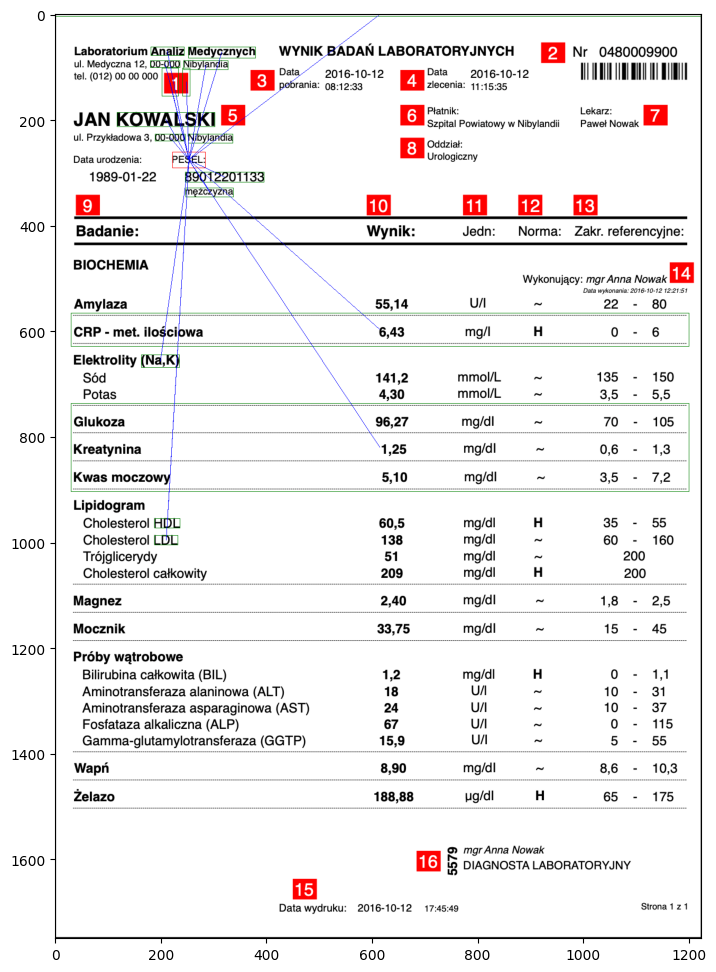

In [7]:
plt.figure(figsize=(10, 12))
plt.imshow(image)
plt.show()